# Assignment 2

## Task 1


**The dataset assigned to me is 'Alzheimer's Disease and Healthy Aging Data.
Alzheimer's is a type of dementia that affects large number of people all around the world. A part of brain that has control over memory and thoughts gets affected in case of getting diagnosed with this disease. A person with Alzheimer's finds it very difficult to carry on routine tasks. Simple tasks that involve talking, thinking and taking appropriate actions gets affected and the ability to do these gets taken away from the person diagnosed with this disease.**

**This assignment involves analyzing data about Alzheimer's and healthy aging.**


### 1: Data Cleaning and Transformation


####  Handling missing data

**The dataset looks like a survey that consists information about health data. It consists of 250937 records and 39 columns.**

**The significance of this dataset is that it has health related questions like 'Percentage of older adults ever told they have arthritis','Percentage of older adults getting sufficient sleep (>6)' or 'Percentage of older adutls with a lifetime diagnosis of depression'. The response to this is in the column 'Data_Value' in percentages.**

**Dataset also comprises of columns like years, location, geolocation**


In [51]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from sklearn.preprocessing import LabelEncoder

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
# Loading data
df_health_data = pd.read_csv("C:\\Users\\Sayal\\OneDrive\\Desktop\\6600_NU\\Assignment 2\\Task 1\\Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")

C:\Users\Sayal\AppData\Local\Temp\ipykernel_35792\1878087459.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_health_data = pd.read_csv("C:\\Users\\Sayal\\OneDrive\\Desktop\\6600_NU\\Assignment 2\\Task 1\\Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")


In [3]:
# Inspecting dataframe
df_health_data

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE,2021,2021,WEST,West,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9004,AGE,AGE_OVERALL,RACE,HIS,NaN,NaN,NaN
1,BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL,2017,2017,NRE,Northeast,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9001,AGE,65PLUS,OVERALL,OVERALL,NaN,NaN,NaN
2,BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL,2019,2019,MDW,Midwest,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,9002,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN
3,BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER,2020,2020,US,"United States, DC & Territories",BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,59,AGE,65PLUS,GENDER,FEMALE,NaN,NaN,NaN
4,BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER,2020,2020,NH,New Hampshire,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,33,AGE,5064,GENDER,FEMALE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,BRFSS~2015~2015~54~Q30~TCC01~AGE~RACE,2015,2015,WV,West Virginia,BRFSS,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,...,Q30,NaN,54,AGE,AGE_OVERALL,RACE,ASN,NaN,NaN,NaN
250933,BRFSS~2015~2015~40~Q35~TOC03~AGE~RACE,2015,2015,OK,Oklahoma,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,40,AGE,5064,RACE,BLK,NaN,NaN,NaN
250934,BRFSS~2017~2017~33~Q44~TOC12~AGE~OVERALL,2017,2017,NH,New Hampshire,BRFSS,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,NaN,...,Q44,NaN,33,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN
250935,BRFSS~2015~2015~51~Q39~TGC04~AGE~RACE,2015,2015,VA,Virginia,BRFSS,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,NaN,...,Q39,NaN,51,AGE,65PLUS,RACE,HIS,NaN,NaN,NaN


In [4]:
# Selecting top 10 rows
df_health_data.head(10)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE,2021,2021,WEST,West,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9004,AGE,AGE_OVERALL,RACE,HIS,NaN,NaN,NaN
1,BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL,2017,2017,NRE,Northeast,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9001,AGE,65PLUS,OVERALL,OVERALL,NaN,NaN,NaN
2,BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL,2019,2019,MDW,Midwest,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,9002,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN
3,BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER,2020,2020,US,"United States, DC & Territories",BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,59,AGE,65PLUS,GENDER,FEMALE,NaN,NaN,NaN
4,BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER,2020,2020,NH,New Hampshire,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,33,AGE,5064,GENDER,FEMALE,NaN,NaN,NaN
5,BRFSS~2015~2015~9002~Q43~TOC11~AGE~RACE,2015,2015,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9002,AGE,65PLUS,RACE,NAA,NaN,NaN,NaN
6,BRFSS~2020~2020~59~Q35~TOC03~AGE~GENDER,2020,2020,US,"United States, DC & Territories",BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,59,AGE,65PLUS,GENDER,MALE,NaN,NaN,NaN
7,BRFSS~2021~2021~9001~Q18~TSC08~AGE~OVERALL,2021,2021,NRE,Northeast,BRFSS,Screenings and Vaccines,Influenza vaccine within past year,Percentage of older adults who reported influe...,NaN,...,Q18,NaN,9001,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN
8,BRFSS~2021~2021~17~Q08~TOC01~AGE~GENDER,2021,2021,IL,Illinois,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,17,AGE,5064,GENDER,MALE,NaN,NaN,NaN
9,BRFSS~2020~2020~50~Q34~TOC09~AGE~OVERALL,2020,2020,VT,Vermont,BRFSS,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,NaN,...,Q34,NaN,50,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN


In [5]:
# Selecting bottom rows
df_health_data.tail(10)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
250927,BRFSS~2016~2016~39~Q07~TOC05~AGE~RACE,2016,2016,OH,Ohio,BRFSS,Overall Health,Oral health: tooth retention,Percentage of older adults who report having l...,NaN,...,Q07,NaN,39,AGE,65PLUS,RACE,BLK,NaN,NaN,NaN
250928,BRFSS~2015~2015~9004~Q19~TSC04~AGE~RACE,2015,2015,WEST,West,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,NaN,...,Q19,NaN,9004,AGE,5064,RACE,ASN,NaN,NaN,NaN
250929,BRFSS~2018~2018~44~Q13~TNC04~AGE~RACE,2018,2018,RI,Rhode Island,BRFSS,Nutrition/Physical Activity/Obesity,Obesity,Percentage of older adults who are currently o...,NaN,...,Q13,NaN,44,AGE,5064,RACE,BLK,NaN,NaN,NaN
250930,BRFSS~2016~2016~34~Q03~TMC01~AGE~GENDER,2016,2016,NJ,New Jersey,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,34,AGE,5064,GENDER,FEMALE,NaN,NaN,NaN
250931,BRFSS~2019~2019~40~Q35~TOC03~AGE~GENDER,2019,2019,OK,Oklahoma,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,40,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
250932,BRFSS~2015~2015~54~Q30~TCC01~AGE~RACE,2015,2015,WV,West Virginia,BRFSS,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,...,Q30,NaN,54,AGE,AGE_OVERALL,RACE,ASN,NaN,NaN,NaN
250933,BRFSS~2015~2015~40~Q35~TOC03~AGE~RACE,2015,2015,OK,Oklahoma,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,40,AGE,5064,RACE,BLK,NaN,NaN,NaN
250934,BRFSS~2017~2017~33~Q44~TOC12~AGE~OVERALL,2017,2017,NH,New Hampshire,BRFSS,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,NaN,...,Q44,NaN,33,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN
250935,BRFSS~2015~2015~51~Q39~TGC04~AGE~RACE,2015,2015,VA,Virginia,BRFSS,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,NaN,...,Q39,NaN,51,AGE,65PLUS,RACE,HIS,NaN,NaN,NaN
250936,BRFSS~2015~2015~49~Q02~TNC02~AGE~RACE,2015,2015,UT,Utah,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,49,AGE,5064,RACE,HIS,NaN,NaN,NaN


In [6]:
# Inspecting dimensions: retrieveing the number of rows and columns 
df_health_data.shape 

(250937, 39)

In [7]:
# Checking columns names
list(df_health_data)

['RowId',
 'YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'Datasource',
 'Class',
 'Topic',
 'Question',
 'Response',
 'Data_Value_Unit',
 'DataValueTypeID',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Sample_Size',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'Geolocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'ResponseID',
 'LocationID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3',
 'Report']

In [8]:
# Checking datatypes for all the columns
column_datatypes = df_health_data.dtypes
print(column_datatypes)

RowId                          object
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Response                      float64
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit          object
Sample_Size                   float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3       float64
Stratification3               float64
Geolocation 

In [9]:
# Below is the summary of the dataset
df_health_data.describe()

,YearStart,YearEnd,Response,Data_Value,Data_Value_Alt,Sample_Size,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID3,StratificationID3,Report
count,250937.000000,250937.000000,0.0,169302.000000,169302.000000,0.0,0.0,0.0,0.0,250937.000000,0.0,0.0,0.0
mean,2017.940933,2018.169716,NaN,37.328349,37.328349,NaN,NaN,NaN,NaN,793.866437,NaN,NaN,NaN
std,2.031564,2.081039,NaN,25.213181,25.213181,NaN,NaN,NaN,NaN,2502.174327,NaN,NaN,NaN
min,2015.000000,2015.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2016.000000,2016.000000,NaN,15.700000,15.700000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN
50%,2018.000000,2018.000000,NaN,32.300000,32.300000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN
75%,2020.000000,2020.000000,NaN,56.000000,56.000000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN
max,2021.000000,2021.000000,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,9004.000000,NaN,NaN,NaN


In [10]:
# Counting the number of missing values for all the columns
df_health_data.isnull().sum()

RowId                              0
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Response                      250937
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     81635
Data_Value_Alt                 81635
Data_Value_Footnote_Symbol    151823
Data_Value_Footnote           151823
Low_Confidence_Limit           81785
High_Confidence_Limit          81785
Sample_Size                   250937
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        32376
Stratification2                32376
StratificationCategory3       250937
Stratification3               250937
Geolocation                    26709
C

In [11]:
# Dropping the columns that does not have a single record

df_health_data.drop('Response', axis=1, inplace=True)
df_health_data.drop('Sample_Size', axis=1, inplace=True)
df_health_data.drop('StratificationCategory3', axis=1, inplace=True)
df_health_data.drop('Stratification3', axis=1, inplace=True)
df_health_data.drop('ResponseID', axis=1, inplace=True)
df_health_data.drop('StratificationCategoryID3', axis=1, inplace=True)
df_health_data.drop('StratificationID3', axis=1, inplace=True)
df_health_data.drop('Report', axis=1, inplace=True)


In [12]:
# Inspecting dimensions after columns have been dropped
df_health_data.shape

(250937, 31)

In [13]:
# Filling missing values in columns 'Data_Value' & 'Data_Value_Alt' with zero

df_health_data['Data_Value'] = df_health_data['Data_Value'].fillna(0)
df_health_data['Data_Value_Alt'] = df_health_data['Data_Value_Alt'].fillna(0)



In [14]:
# Filling missing values in columns 'Data_Value_Footnote_Symbol' & 'Data_Value_Footnote' with value "Unknown"

df_health_data['Data_Value_Footnote_Symbol'] = df_health_data['Data_Value_Footnote_Symbol'].fillna("Unknown")
df_health_data['Data_Value_Footnote'] = df_health_data['Data_Value_Footnote'].fillna("Unknown")


In [15]:
datatype = df_health_data.dtypes['Low_Confidence_Limit']
print(datatype)

object


Column 'Low_Confidence_Limit' is an object type having values ranging between -0.7 to 99.6 and column 'High_Confidence_Limit' too is an object type having values ranging between 1.4 to 100. Filling missing values in both these columns with "Unknown"

In [73]:
# Filling missing values in columns 'Low_Confidence_Limit' & 'High_Confidence_Limit' with value "Unknown"

df_health_data['Low_Confidence_Limit'] = df_health_data['Low_Confidence_Limit'].fillna("Unknown")
df_health_data['High_Confidence_Limit'] = df_health_data['High_Confidence_Limit'].fillna("Unknown")

In [17]:
# Filling missing values in columns 'StratificationCategory2', 'Geolocation' & 'Stratification2' with value "Unknown"

df_health_data['StratificationCategory2'] = df_health_data['StratificationCategory2'].fillna("Unknown")
df_health_data['Stratification2'] = df_health_data['Stratification2'].fillna("Unknown")
df_health_data['Geolocation'] = df_health_data['Geolocation'].fillna("Unknown")

In [18]:
# Checking number of missing values again after filling it with appropriate values

df_health_data.isnull().sum()

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Datasource                    0
Class                         0
Topic                         0
Question                      0
Data_Value_Unit               0
DataValueTypeID               0
Data_Value_Type               0
Data_Value                    0
Data_Value_Alt                0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Low_Confidence_Limit          0
High_Confidence_Limit         0
StratificationCategory1       0
Stratification1               0
StratificationCategory2       0
Stratification2               0
Geolocation                   0
ClassID                       0
TopicID                       0
QuestionID                    0
LocationID                    0
StratificationCategoryID1     0
StratificationID1             0
StratificationCategoryID2     0
StratificationID2             0
dtype: i

#### Duplicate Records
**The file does not contain any duplicate records as seen below**

In [19]:
# checking for duplicate values

duplicate_values = df_health_data.duplicated()
print(duplicate_values)

0         False
1         False
2         False
3         False
4         False
          ...  
250932    False
250933    False
250934    False
250935    False
250936    False
Length: 250937, dtype: bool


#### Checking for inaccuracies and inconsistencies in the data 

**Columns 'Low_Confidence_Limit' & 'High_Confidence_Limit' contains '.'. Replacig it with "Unknown" value**

In [20]:
# Replacing '.' with 'Unknown' values

df_health_data['Low_Confidence_Limit'].replace('.', 0, inplace=True)
df_health_data['High_Confidence_Limit'].replace('.', 0, inplace=True)

#### Data Normalization or scaling

**Dataset mostly consists of categorical data. The few numeric columns that are present do not require normalization or scaling for the kind of analysis that would be done on it. 
Below are the numeric columns:**
- 'YearStart' & 'YearEnd' do not require normalization as I would be directly analyzing it with various categorical features and the range of values for these two features isn't large
- 'Data_Value' & 'Data_Value_Alt' too would not require normalization as I am analyzing it individually to show the distribution of the values in it
- 'StratificationCategory3' & 'Stratification3' does not require normalization because there are no mathematical operations being performed on it for analysis purpose. Additionally, keeping their original values is necessary for meaningful visualizations
- 'LocationID' too does not require normalization as I am analyzing it with categorical features and require their original values for appropriate and meaningful visualizations
 

**Encoding Categorical Data - Not required for the analysis that would be done**



**Feature Engineering**

**Creating two columns: YearStart_catergorical & YearEnd_categorical from existing features 'YearStart' and 'YearEnd' to create meaningful visualizations.**

In [74]:
df_health_data['YearStart_catergorical'] =  df_health_data['YearStart'].astype('category')
df_health_data['YearEnd_categorical'] =  df_health_data['YearEnd'].astype('category')

print(df_health_data['YearStart_catergorical'].dtype)
print(df_health_data['YearEnd_categorical'].dtype)

category
category


In [75]:
df_health_data

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,YearStart_catergorical,YearEnd_categorical,Class_numeric,Topic_numeric,latitide,longitude
0,BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE,2021,2021,WEST,West,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,AGE,AGE_OVERALL,RACE,HIS,2021,2021,4,0,NaN,NaN
1,BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL,2017,2017,NRE,Northeast,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,AGE,65PLUS,OVERALL,OVERALL,2017,2017,4,0,NaN,NaN
2,BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL,2019,2019,MDW,Midwest,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,...,AGE,AGE_OVERALL,OVERALL,OVERALL,2019,2019,3,9,NaN,NaN
3,BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER,2020,2020,US,"United States, DC & Territories",BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,AGE,65PLUS,GENDER,FEMALE,2020,2020,4,0,NaN,NaN
4,BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER,2020,2020,NH,New Hampshire,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,AGE,5064,GENDER,FEMALE,2020,2020,2,14,-71.500361,43.655950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,BRFSS~2015~2015~54~Q30~TCC01~AGE~RACE,2015,2015,WV,West Virginia,BRFSS,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,...,AGE,AGE_OVERALL,RACE,ASN,2015,2015,1,34,-80.712640,38.665510
250933,BRFSS~2015~2015~40~Q35~TOC03~AGE~RACE,2015,2015,OK,Oklahoma,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,...,AGE,5064,RACE,BLK,2015,2015,4,30,-97.521070,35.472031
250934,BRFSS~2017~2017~33~Q44~TOC12~AGE~OVERALL,2017,2017,NH,New Hampshire,BRFSS,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,%,...,AGE,AGE_OVERALL,OVERALL,OVERALL,2017,2017,4,33,-71.500361,43.655950
250935,BRFSS~2015~2015~51~Q39~TGC04~AGE~RACE,2015,2015,VA,Virginia,BRFSS,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,%,...,AGE,65PLUS,RACE,HIS,2015,2015,0,18,-78.457890,37.542681


**Newly generated dataframe includes two new features 'YearStart_catergorical' and 'YearEnd_categorical'**

**Date and time extration feature extraction - not relevant**

### 2. Create 15 distinct visualizations using matplotlib, each representing various features, columns, or attributes. Employ different types of charts for each visualization, ensuring none are repeated. Utilize a wide range of attributes in the dataset. None of the charts should be same. Provide insights for each visualization, incorporating at least 8 to 10 different types of charts. 

### Visualization 1

**Stacked Bar Chart: Comparing number of classes by year**


<Figure size 1000x600 with 0 Axes>

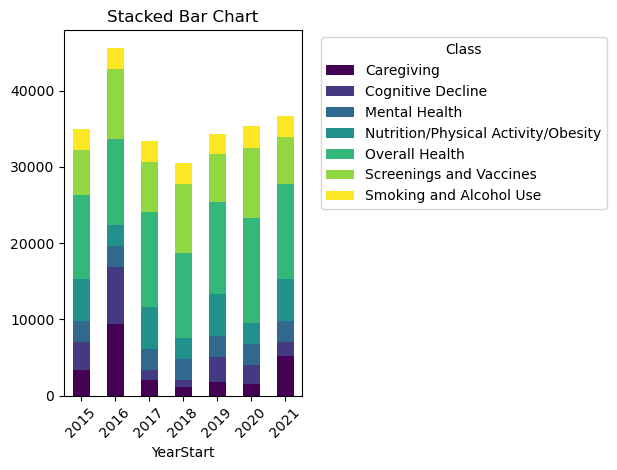

In [76]:
class_by_year = df_health_data.groupby('YearStart')['Class'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10,6))
class_by_year.plot(kind='bar', stacked=True, cmap='viridis')
plt.xticks(rotation=45)
plt.title('Stacked Bar Chart')
plt.legend(title='Class', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights with conclusion for Stacked Bar Chart:**

**The visualiation shows comparison of different classes across various years. Classes comprise of various health related categories as seen in the plot. There seems to have been a lot of survey done in the year 2016 with main focus on topics like 'Caregiving', 'Overall Health' and 'Screenings and Vaccines'. This means that people would have gone through screenings for various health related tests and greater percentage would have been diagnosed with some health issue due to which the Caregiving Class seems to have a greater percentage.** 



### Visualization 2

**Box plot: Distribution of data values in various categories of class** 

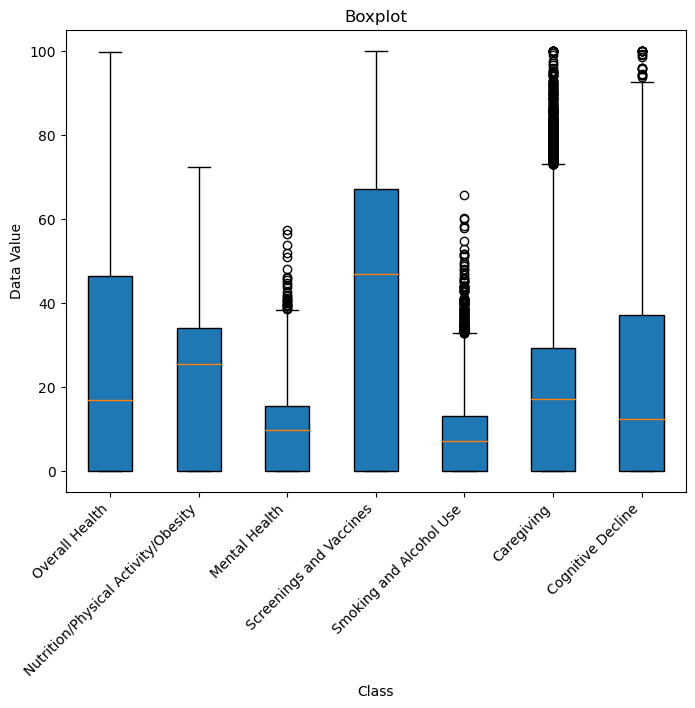

In [36]:
data_grouped = [df_health_data[df_health_data['Class'] == category]['Data_Value'].tolist() for category in df_health_data['Class'].unique()]

plt.figure(figsize=(8,6))
plt.boxplot(data_grouped, labels=df_health_data['Class'].unique(), patch_artist=True)
plt.xticks(rotation=45, ha='right') #adjusting rotation and alignment
plt.title('Boxplot')
plt.xlabel('Class')
plt.ylabel('Data Value')
plt.grid(False)
plt.show()

**Insights & conclusion for boxplot:**

**Plot shows distribution of data values(response to the questions in percentages) to categories of class. It can be seen that there is a lot of difference in central tendencies of all the categories. The plot depicts that people are aware of the importance of getting their health checked due to which the spread across 'Screenings and Vaccines' is more. There is not lot many people having mental health issues as compared to nutrition, ohysical activity, obesity. By having an active lifestyle, this percentage could be reduced. Addiitonally, eventhough the percentage of mental health issues and issues realted to smoking and alcohol are relatively less, it would be better to have no issues with it. TO do so, people would have to reduce smoking and alcohol intake and instead get engaged in extra-curricular activites which would eventually help with mental health problems as well.**   

### Visualization 3

**Simple Bar Chart**

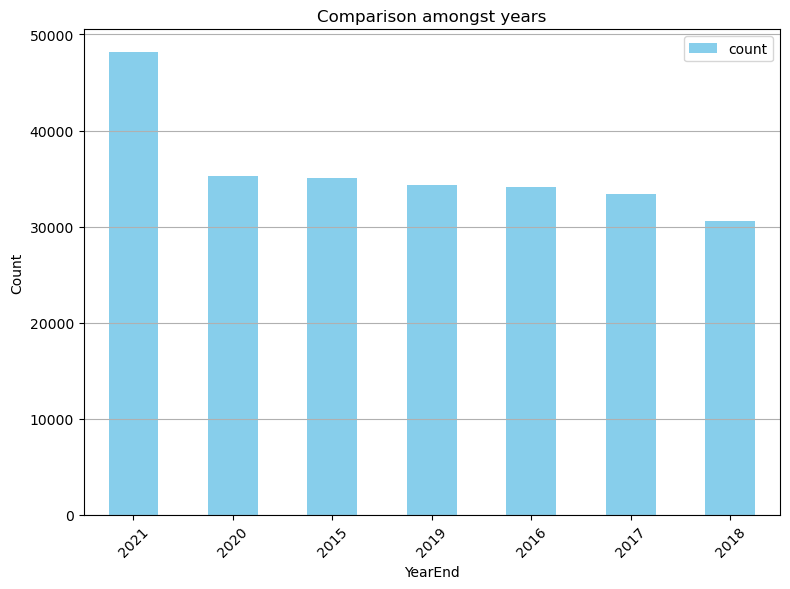

In [82]:
count_of_survey_yearwise = df_health_data['YearEnd'].value_counts()

plt.figure(figsize=(8,6))
count_of_survey_yearwise.plot(kind='bar', color='skyblue')
plt.title('Comparison amongst years')
plt.xlabel('YearEnd')
plt.ylabel('Count')
plt.xticks(ticks=range(len(count_of_survey_yearwise)), labels=[label for label in count_of_survey_yearwise.index], rotation=45)    
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

**Insights & conclusion for simple bar chart:**

**Visualization shows comparison of the count of survey being done each year. As seen above, maximum survey was completed in the year 2021 and the least was completed in 2018. This could have been due to various reasons like administrative difficulties, people being surveyed in the year 2018 were not very responive or the resources needed to complete the survey were insuffucient. The good part is that after 2018, the number of surveys being completed kept on increasing so the problem that arised in 2018 seems to have been resolved thus helping more number of people get aware of their health. This ultimately helps in improving the overall health too, which was a result of survey being done and appropriate advise being taken by individuals.** 

### Visualization 4

**Pie Chart**

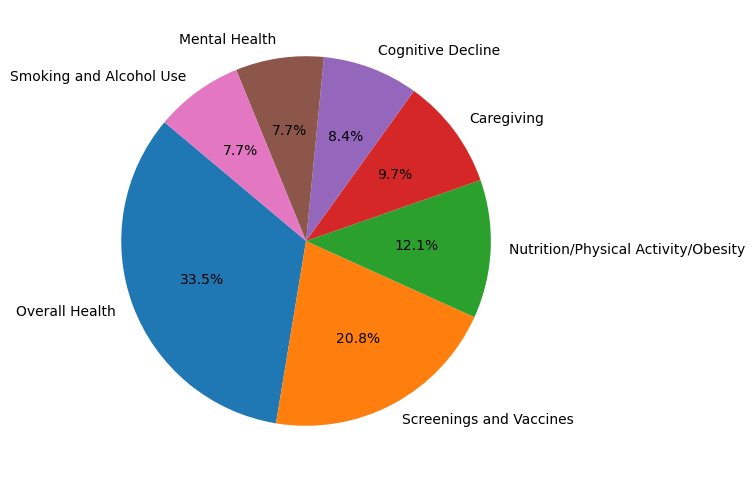

In [44]:
count = df_health_data['Class'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.show()

**Insights & conclusion for Pie Chart:**

**In this, I counted the unique values of feature 'Class' which ultimately shows the distribution of it. The size of each slice is representing the proportion of one category with respect to the remaing Class categories. It can be seen that the most amount of survey was done related to overall health and the least was conducted on topics related to mental health, smoking and alcohol use. It is clear that not much survey has been done on important topics like nutrition, physical activity and obesity. There is a direct link to less physical activity being a major cause of increase in stress levels affecting an individual's mental health. It is important to give more focus on nutrition and physical health to be able to increase awareness amongst people and improve overall mental health.**

### Visualization 5

**Heatmap**

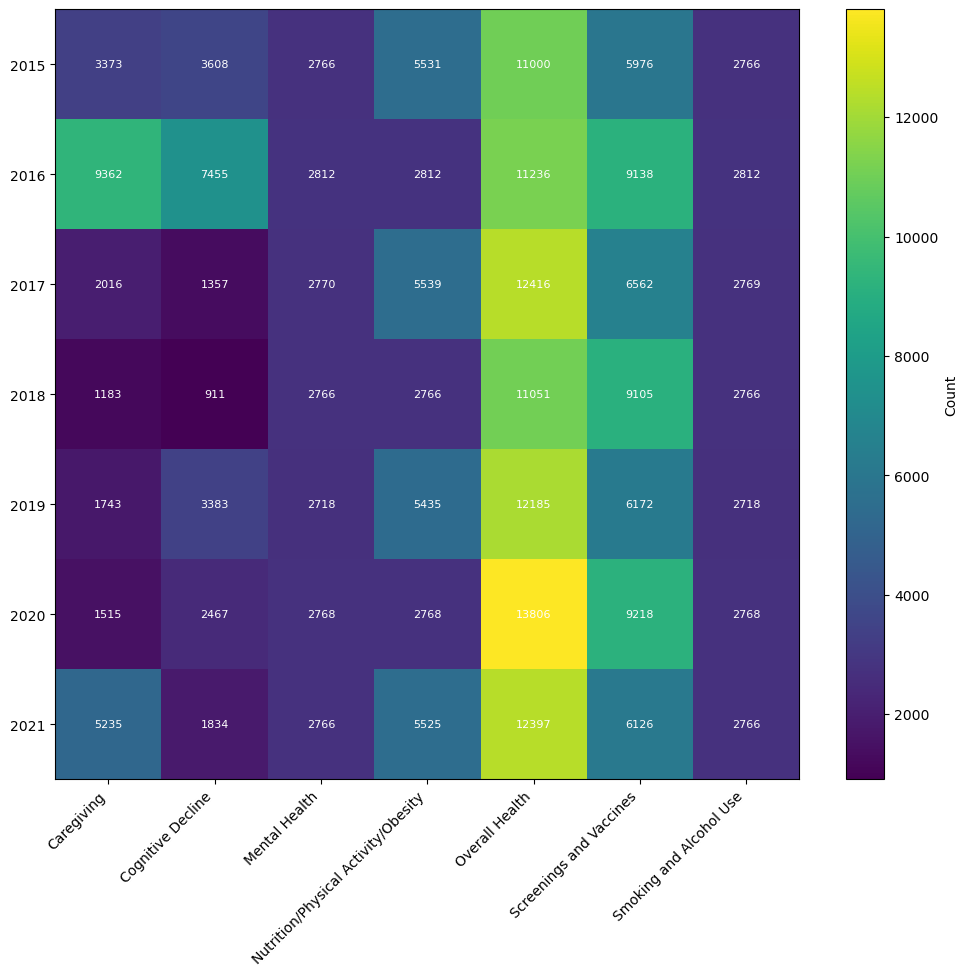

In [83]:
count_of_class = df_health_data.groupby(['YearStart_catergorical', 'Class']).size().unstack(fill_value=0)

plt.figure(figsize=(12,10))
plt.imshow(count_of_class, cmap='viridis', aspect='auto')

for a in range (len(count_of_class)):
    for b in range(len(count_of_class.columns)):
        plt.text(b,a, count_of_class.values[a,b], ha='center', va='center', color='white', fontsize=8)
        
plt.xticks(np.arange(len(count_of_class.columns)), count_of_class.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(count_of_class)), count_of_class.index)
plt.colorbar(label='Count')
plt.show()


**Insights & conclusion: Heatmap:**

**The plot depicts distribution and the relationship between categorical values present in Year with Class categories. Here, each cell is representing the number of times acombination of specific combination of 'year' and 'class has occurred. It is clear that the dark colored cell combinations have occurred less as compared to the ligher ones. The survey conducted in the year 2020 on overall health is maximum. Thsi could have been a result of year 2020 being in the middle of pandemic. Naturally. people were falling sick often which can be seen in the response of this survy. After becomin aware of overall health, people would have definitely taken appopriate actions thus leading to a good overall health as well.**

### Visualization 6

**Countplot**

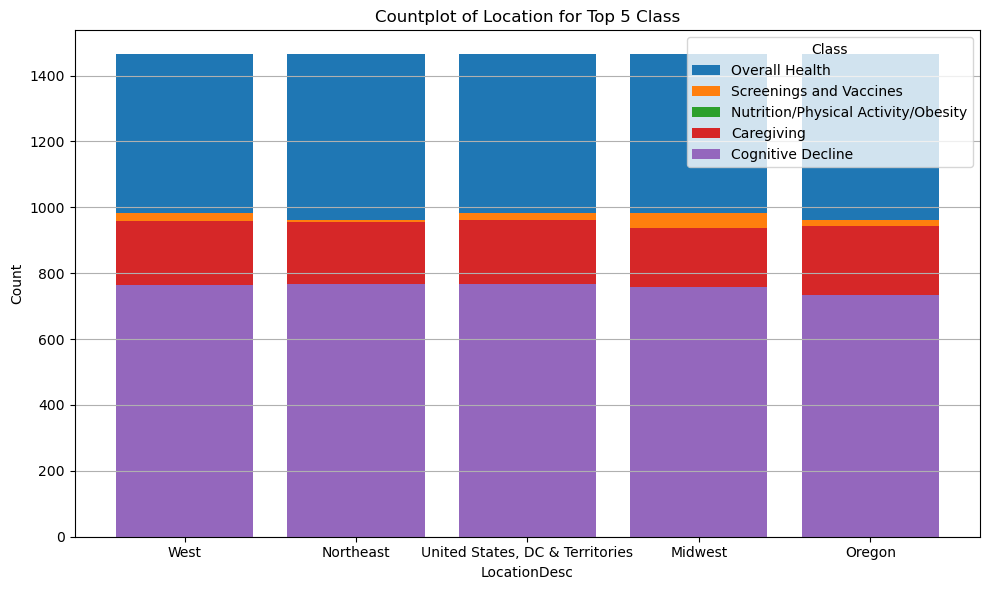

In [53]:
top_five_loc = df_health_data['LocationDesc'].value_counts().nlargest(5).index
top_five_class = df_health_data['Class'].value_counts().nlargest(5).index

df_health_data_top = df_health_data[df_health_data['LocationDesc'].isin(top_five_loc) & df_health_data['Class'].isin(top_five_class)]
plt.figure(figsize=(10,6))
for cl in top_five_class:
    plt.bar(df_health_data_top[df_health_data_top['Class'] == cl]['LocationDesc'].value_counts().index,
           df_health_data_top[df_health_data_top['Class'] == cl]['LocationDesc'].value_counts(),
           label=cl)
plt.xlabel('LocationDesc')
plt.ylabel('Count')
plt.title('Countplot of Location for Top 5 Class')
plt.legend(title='Class')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insights & conclusion:**

**The plot above shows the distribution of the count of occurrences of values in top 5 Locations for top 5 class categories. It is clear that the least amount of survey being done on screenings and vaccine was at the location northeast. The cognitive decline survey seems to be in equal quantities across all 5 locations. It is important to increase the con tof survey on the northeast to improve the overall health. This could have been a result of insufficient good quality equipments that are needed for conducting screenings. By increasing the good quality equipments, this issue could be resolved.**

### Visualization 7

**Histogram**

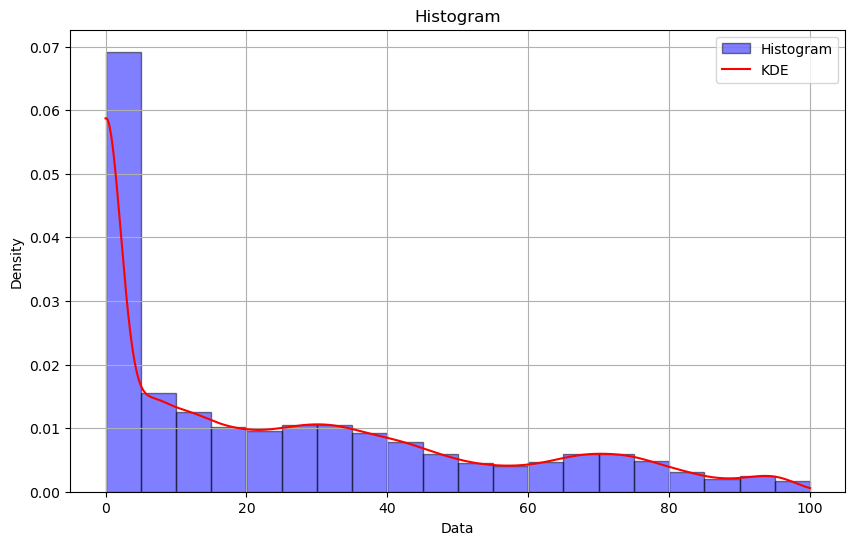

In [85]:
plt.figure(figsize=(10,6))
plt.hist(df_health_data['Data_Value'], bins=20, alpha=0.5, color='blue', edgecolor='black', density=True, label='Histogram')

kde=gaussian_kde(df_health_data['Data_Value'])
x_vals=np.linspace(min(df_health_data['Data_Value']), max(df_health_data['Data_Value']), 1000)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram')
plt.legend()
plt.grid(True)
plt.show()

**Insights & conclusion for hsitogram:**

**This plot visualizes the distribution of data values. Data values are the responses to the health related questions in the form of percentage. It is clear that there is very leass percentage of health related questions that are above 80%. This also means that responses to quesions like 'Percentage of older adults ever told they have arthritis' or 'Percentage of older adutls with a lifetime diagnosis of depression' is quite less which can be a good thing. THis also means that if effective measures are taken for every health realted problem, overall health amongst individuals can improve.**

### Visualization 8

**Violin Plot**

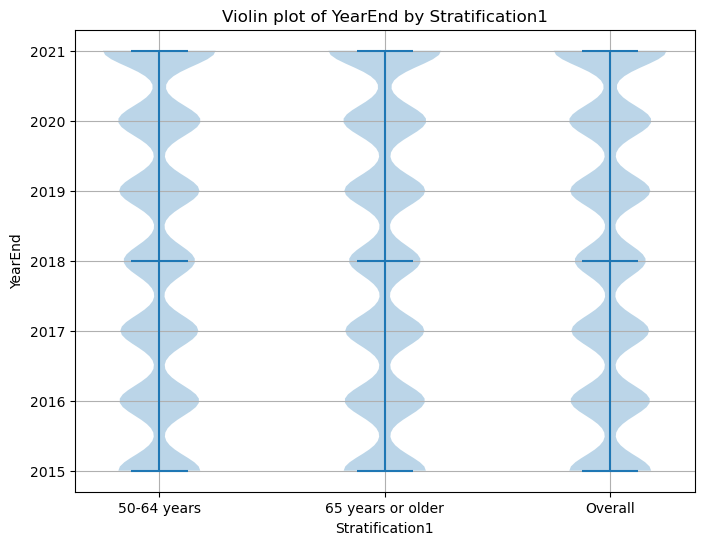

In [25]:
data_grouped = df_health_data.groupby('Stratification1')['YearEnd'].apply(list)

plt.figure(figsize=(8,6))
plt.violinplot(data_grouped, showmeans=False, showextrema=True, showmedians=True)
plt.xticks(np.arange(1, len(data_grouped) + 1), data_grouped.index)
plt.title('Violin plot of YearEnd by Stratification1')
plt.xlabel('Stratification1')
plt.ylabel('YearEnd')
plt.grid(True)
plt.show()


**Insights & conclusion for violin plot:**

**This plot depicts that there is uniform distribution amongst older age groups across all the years. This shows that even old people do keep a check on their health making it possible for them to take preventive action in case of any diagnosis. This helps in reducing the workload on hte healthcare industry. Problem can arise when older generation is not aware of their health condidiotns ultimatley putting a lot of pressure on the resources of the healthcare system.**

### Visualization 9

**Horizontal Stacked Bar Chart**

<Figure size 1000x600 with 0 Axes>

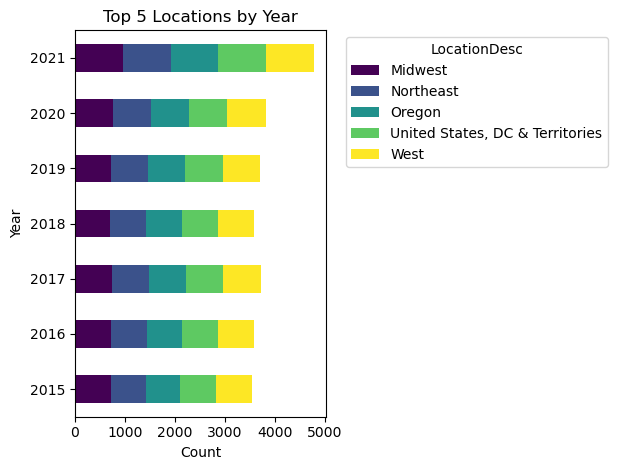

In [86]:
top_five_loc = df_health_data['LocationDesc'].value_counts().nlargest(5).index
df_new = df_health_data[df_health_data['LocationDesc'].isin(top_five_loc)]

year = df_new.groupby('YearEnd')['LocationDesc'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10,6))
year.plot(kind='barh', stacked=True, cmap='viridis')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Top 5 Locations by Year')
plt.legend(title='LocationDesc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights & conclusion:**

**From the plot above, it is clear that number of surveys being held increased alot in the year 2021 across all top 5 locations. This can be a result of COVID-19. Post pandemic, every individual tried best to become aware of overall health. There is a probability that the healtcare industry too would have encouraged everyone to keep a check on their health to be able to improve overall immunity after becoming aware of their health conditions. This definitely helps in improving the health globally.**

### Visualization 10

**Scatter Plot**

In [34]:
df_health_data['latitide'] = df_health_data['Geolocation'].str.split().str[1]
df_health_data['longitude'] = df_health_data['Geolocation'].str.split().str[2]

df_health_data['latitide'] = df_health_data['latitide'].str.strip('()').astype(float)
df_health_data['longitude'] = df_health_data['longitude'].str.strip('()').astype(float)

print(df_health_data['latitide'])
print(df_health_data['longitude'])

0                NaN
1                NaN
2                NaN
3                NaN
4         -71.500361
             ...    
250932    -80.712640
250933    -97.521070
250934    -71.500361
250935    -78.457890
250936   -111.587131
Name: latitide, Length: 250937, dtype: float64
0               NaN
1               NaN
2               NaN
3               NaN
4         43.655950
            ...    
250932    38.665510
250933    35.472031
250934    43.655950
250935    37.542681
250936    39.360700
Name: longitude, Length: 250937, dtype: float64


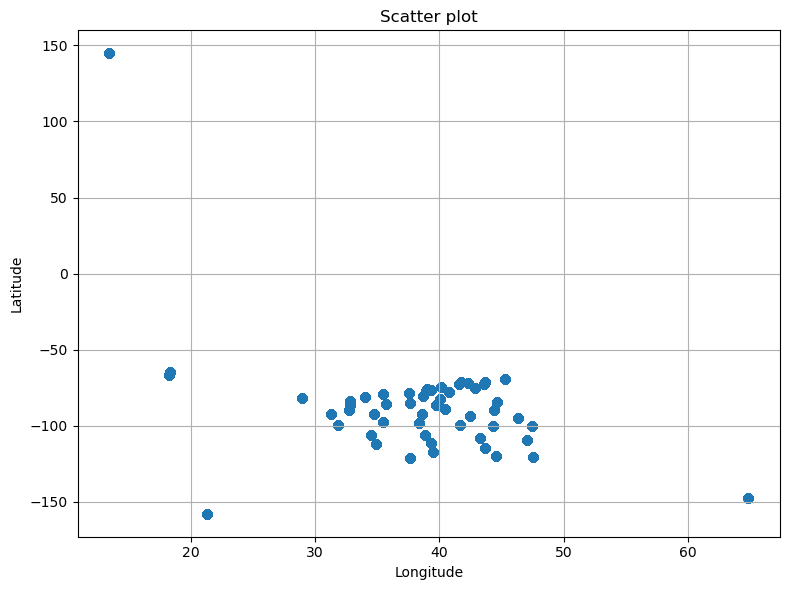

In [36]:
df_health_data_geo = df_health_data.dropna(subset=['latitide', 'longitude'])

plt.figure(figsize=(8,6))
plt.scatter(df_health_data_geo['longitude'],df_health_data_geo['latitide'] )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights & conclusion:**

**It can be seen from the scatter plot above that there is a lot of concentation at the lower middle of the plot. This tells us that the survey being held was concentrated at a particualr location (USA, in this case). Few outliers can also be seen indicating that there were few places far away from USA where the survey was held.**

### Visualization 11

**Area Plot**

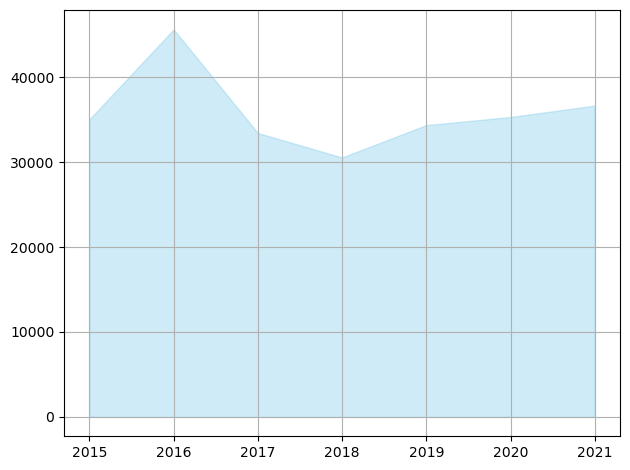

In [53]:
count_of_year = df_health_data['YearStart'].value_counts().sort_index()
plt.fill_between(count_of_year.index, count_of_year.values, color='skyblue', alpha=0.4)


plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Area Plot of Year Occurrences')
plt.xticks(count_of_year.index)
plt.grid(True)
plt.tight_layout()

plt.show()

**Insights & conclusion:**

**The plot shows the number of surveys that were held in the specified years. There seems to be a drop in it in the year 2018. This could have been a result of either having limited resources or some difficulty in getting the responses for health related questions.** 

### Visualization 12

**Hexagonal Bin Plot**

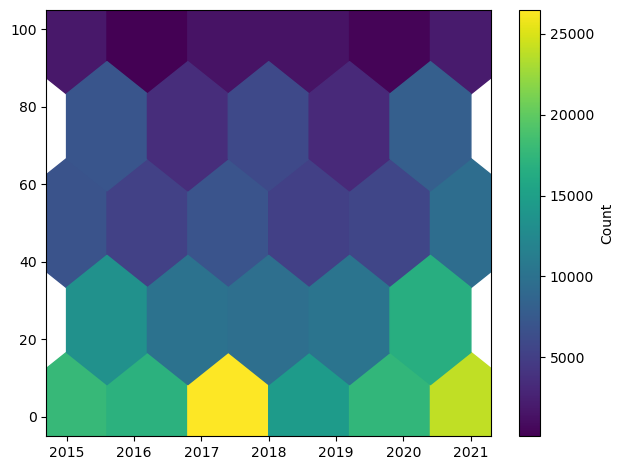

In [58]:
plt.hexbin(df_health_data['YearEnd'], df_health_data['Data_Value'], gridsize=5, cmap='viridis')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()

**Insights & conclusions:**

**The plot above shows the distribution of data values for the years in the form in a scatter plot. It is clear that there were many responses in the year 2017 indicating that conducting the survey in that year was successful. Again, in the year 2021, the survey seems to have been a success as there seems to be a concentration of data points in that year. This could be a result of COVID-19.**

### Visualization 13

**Countplot**

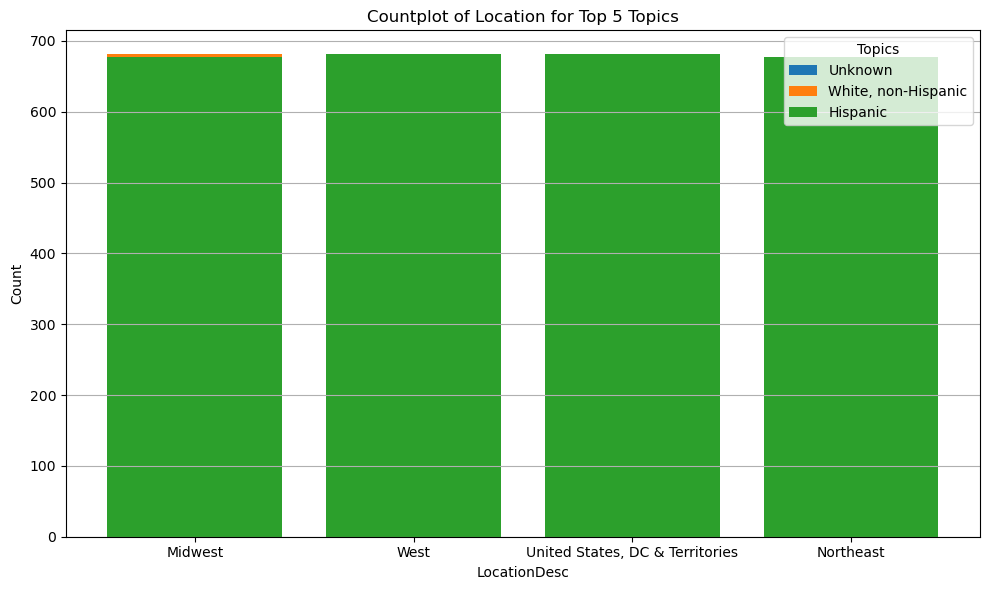

In [87]:
top_four_loc = df_health_data['LocationDesc'].value_counts().nlargest(4).index
top_three_strat = df_health_data['Stratification2'].value_counts().nlargest(3).index

df_health_data_top = df_health_data[df_health_data['LocationDesc'].isin(top_four_loc) & df_health_data['Stratification2'].isin(top_three_strat)]
plt.figure(figsize=(10,6))
for t in top_three_strat:
    plt.bar(df_health_data_top[df_health_data_top['Stratification2'] == t]['LocationDesc'].value_counts().index,
           df_health_data_top[df_health_data_top['Stratification2'] == t]['LocationDesc'].value_counts(),
           label=t)
plt.xlabel('LocationDesc')
plt.ylabel('Count')
plt.title('Countplot of Location for Top 5 Topics')
plt.legend(title='Topics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insights & conclusion:**

**From the countplot plotted above, it can be seen that there seems to very less amount of 'White, non-Hispanic' group of people at the location Midwest. This means that not many people belonging to this group were part of the survey that lived in the Midwest area. This could be a result of that particular area not having many residents belonging to this group. It is importatn to make sure to include as many people from diverse backgrounds while conducting this survey. This helps in analyzing it properly after all information collection ad drawing conclusions to be able to take appropriate steps in the mdecial field.**

### Visualization 14

**Bar Plot**

C:\Users\Sayal\AppData\Local\Temp\ipykernel_35792\2798462604.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

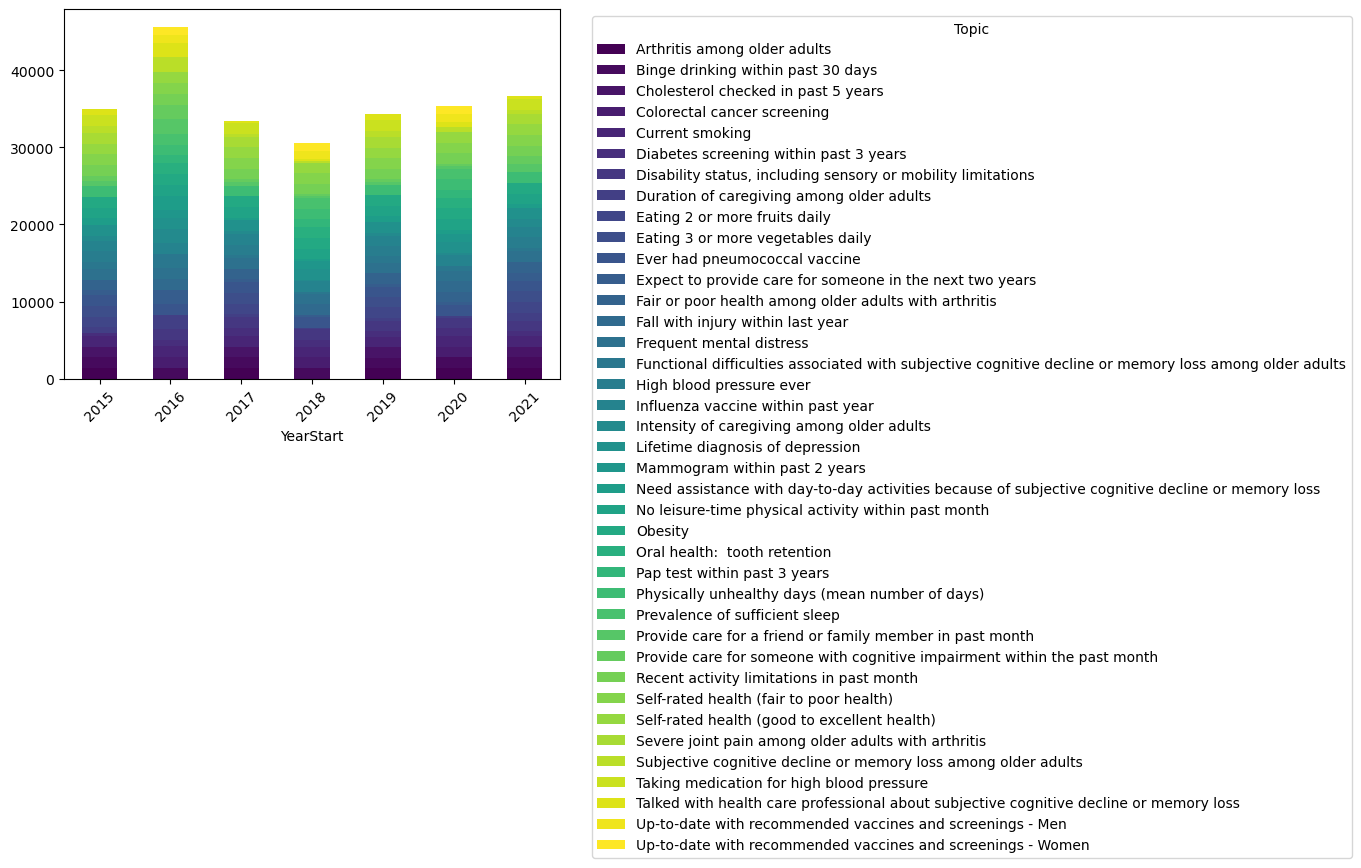

In [68]:
class_by_year = df_health_data.groupby('YearStart')['Topic'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10,6))
class_by_year.plot(kind='bar', stacked=True, cmap='viridis')
plt.xticks(rotation=45)
plt.legend(title='Topic', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights & conclusion:**

**The bar plot compares the survey help on various health related topics amongst various years. It is clear that every topic was euqally focussed and was not preferred over other. This shows that the survey is conducted by keeping in mind all the important factors in an individual's health**

### Visualization 15

**Box Plot**

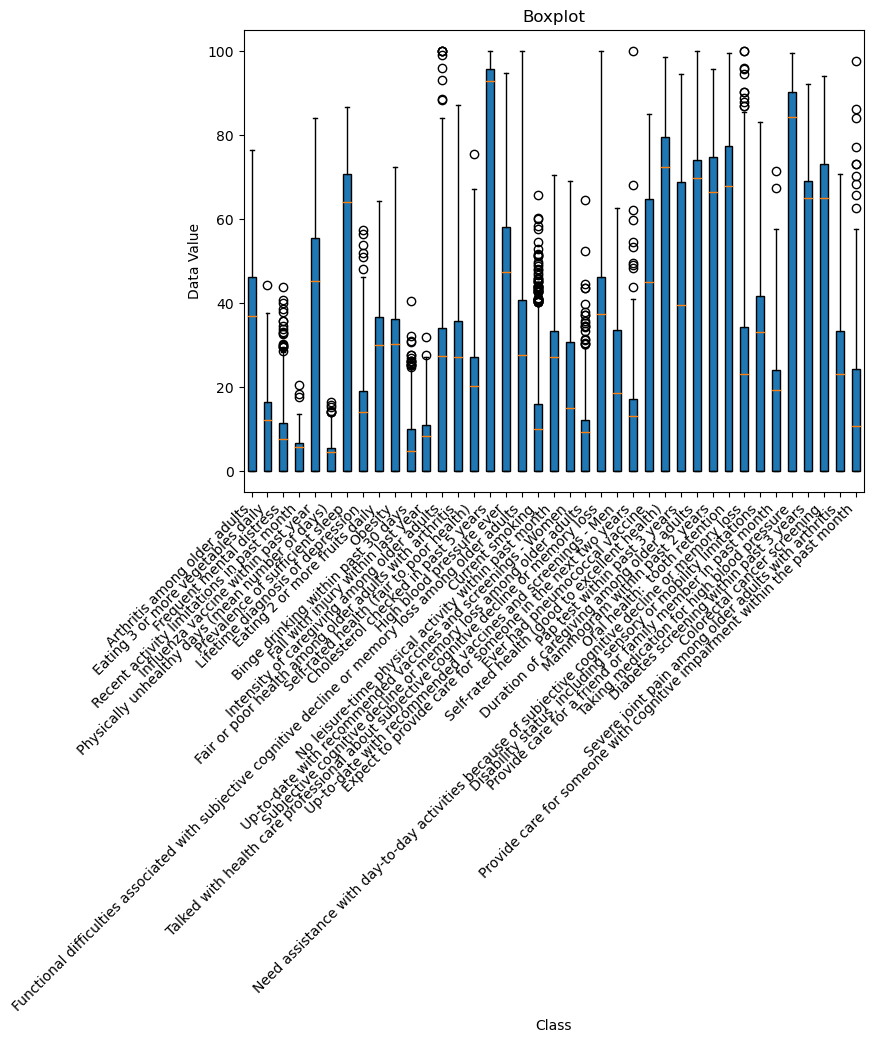

In [70]:
data_grouped = [df_health_data[df_health_data['Topic'] == category]['Data_Value'].tolist() for category in df_health_data['Topic'].unique()]

plt.figure(figsize=(8,6))
plt.boxplot(data_grouped, labels=df_health_data['Topic'].unique(), patch_artist=True)
plt.xticks(rotation=45, ha='right') #adjusting rotation and alignment
plt.title('Boxplot')
plt.xlabel('Class')
plt.ylabel('Data Value')
plt.grid(False)
plt.show()

**Insights & conclusion:**

**The boxplot shows the distribution of data values in health related topics. It can be seen from the plot that the least one is for the topic 'Physically unhealthy days'. This also tells us that most of the days, individuals are having physically healthy days thus, showcasing that the overall health of most people is good. Few of the reasons why some people might be having physically unhealthy days could be 'flu' or 'physical injury' making htem unfit to carry on their usual routine.**

## Question 3: Correlation matrix of numerical features

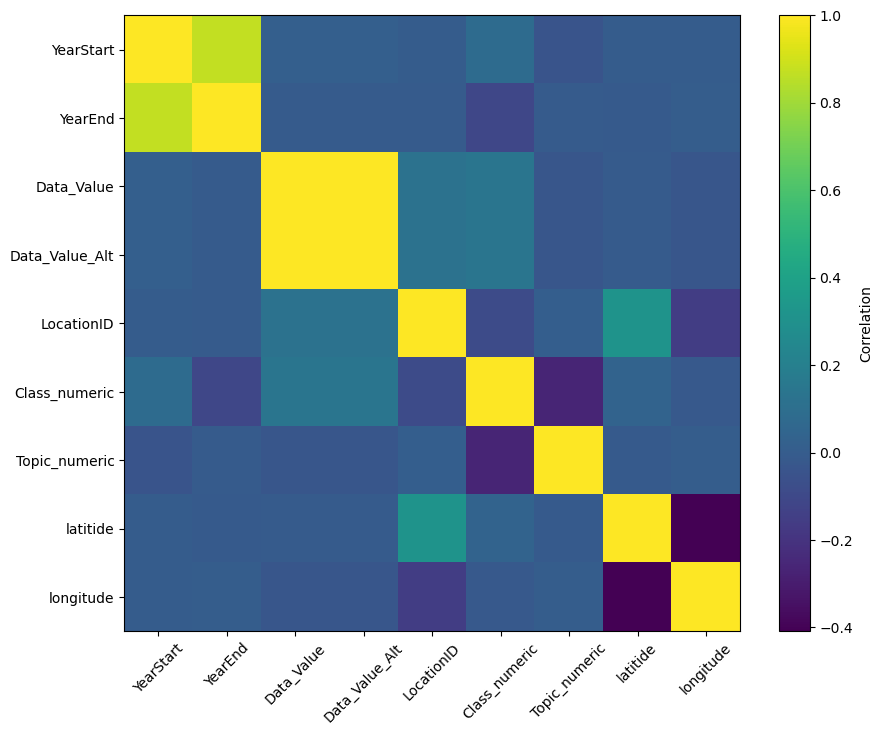

In [72]:
numeric_df = df_health_data.select_dtypes(include=[np.number])


corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

**Insights & conclusion:**

**This plot showcases the relationship between the numerical features of this dataset. It is clear that the features that have high correlation amongst themselves are 'latitude and longitue' and 'data value & data_value_alt'. This tells us that change in one value of latitude would impact the value of longitude greatly. Similarly, data value has a lot of impact on the feature data_value_int.**  